In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib
import numpy as np
import pylab as pl
import sys
#import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
primary_results = pd.read_csv( 'primary_results.csv' )
county_facts = pd.read_csv( 'county_facts.csv' )
county_facts_dict = pd.read_csv( 'county_facts_dictionary.csv' )

In [3]:
primary_results.index = primary_results['fips']
del primary_results['fips']

county_facts.index = county_facts['fips']
del county_facts['fips']

#set the variable code as the index of the dataframe
county_facts_dict.index = county_facts_dict['column_name']
del county_facts_dict['column_name']

In [4]:
#this pulls out the unique county ids from primary results and then picks up the country facts about them and throws them into county fact results
county_facts_results = county_facts.loc[ sorted(list(set(primary_results.index))), : ]

In [5]:
#what's the label of this variable?
#loc takes index names, while iloc takes the numbering
county_facts_dict.loc['EDU635213']

description    High school graduate or higher, percent of per...
Name: EDU635213, dtype: object

In [6]:
trump_results = primary_results[ primary_results[ 'candidate' ] == 'Donald Trump' ]
trump_results = trump_results.sort_index()
#join left
#result = pd.merge(left, right, how='left', on=['key1', 'key2'])
#pd.options.mode.chained_assignment = None 


In [7]:
'''
an aside on chained indexing
Pandas tries to avoid something called chained index. See example below. 
It doesn't like when you take a slice of the data and try to replace values in that slice 
and then save that into the original data. (example 2)
It will, however, allow you to replace values into the entire data frame (example 1). 
'''
import pandas as pd
import numpy as np
#chained indexing
dfb = pd.DataFrame({'a' : ['one', 'one', 'two', 'three', 'two', 'one', 'six'],'c' : np.arange(7)})
#not chained
dfb['c'][dfb.a.str.startswith('o')] = 42
#chained
dfb[dfb.a.str.startswith('o')]['c'] = 42


/Users/kathrynvasilaky/.pyenv/versions/3.5.1/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kathrynvasilaky/.pyenv/versions/3.5.1/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
trump_results.loc[:, 'percent_high_school'] = county_facts_results.loc[:, 'EDU635213' ]
trump_results.loc[:, 'percent_bachelors'] = county_facts_results.loc[:, 'EDU685213' ]

In [9]:
def CorrelationCoeff(X,Y):
    mu_x = np.mean(X)
    mu_y = np.mean(Y)
    N = len(X)
    r = (sum([ X[i]*Y[i] for i in range(N) ]) - N*mu_x*mu_y) \
        / (math.sqrt( sum(X**2)-N*(mu_x**2) )) \
        / (math.sqrt( sum(Y**2)-N*(mu_y**2) ))
    return r

r = -0.348465546969


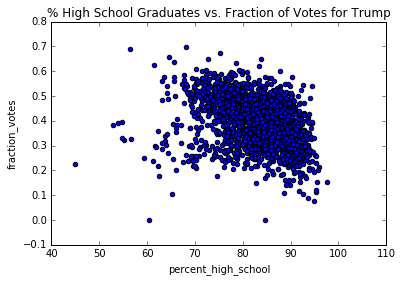

In [10]:
trump_results.plot( kind='scatter', x='percent_high_school', y='fraction_votes',
                    title='% High School Graduates vs. Fraction of Votes for Trump' )
X = trump_results.loc[:,'percent_high_school'].values
Y = trump_results.loc[:,'fraction_votes'].values
r = CorrelationCoeff(X,Y)
print('r = ' + str(r))

r = -0.411616662051


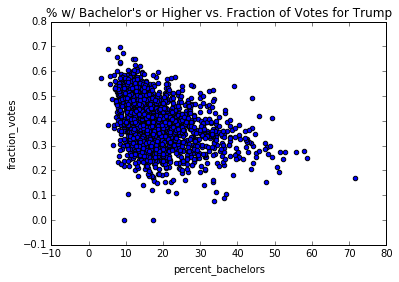

In [11]:
trump_results.plot( kind='scatter', x='percent_bachelors', y='fraction_votes',
                    title='% w/ Bachelor\'s or Higher vs. Fraction of Votes for Trump' )
X = trump_results.loc[:,'percent_bachelors'].values
r = CorrelationCoeff(X,Y)
print('r = ' + str(r))

In [12]:
#i think this is a mistake, because it uses the whole set
#trump_data = county_facts_results.copy()
#pull out the county data for which there is primary trump data available
#trump_data = county_facts_results.copy()

trump_county_data = county_facts_results.loc[primary_results[ primary_results[ 'candidate' ] == 'Donald Trump'].index]

len(trump_county_data)
len(trump_results)

1881

In [13]:
len(trump_results.loc[:,'fraction_votes'])

1881

In [14]:
trump_county_data.iloc[:,1].values

array(['AL', 'AL', 'AL', ..., 'NH', 'NH', 'NH'], dtype=object)

In [15]:
del trump_county_data['area_name']
del trump_county_data['state_abbreviation']

In [16]:
corr_coef = np.zeros( (trump_county_data.shape[1]-1) )
#no index, just an array
Y = trump_results.loc[:,'fraction_votes'].values
for i in range( corr_coef.shape[0] ):
    r = CorrelationCoeff( trump_county_data.iloc[:,i].values, Y )
    corr_coef[i] = r

In [17]:
high_pos_correls_ind = np.argpartition(corr_coef, -5)[-5:]
high_neg_correls_ind = np.argpartition(corr_coef, 5)[:5]

In [18]:
for i in high_pos_correls_ind:
    r = corr_coef[ i ]
    col_name = list(trump_county_data)[i]
    descrip = county_facts_dict.loc[ col_name, 'description' ]
    print(r, '=>', col_name, ':', descrip)

    


0.133671330752 => POP715213 : Living in same house 1 year & over, percent, 2009-2013
0.168564439539 => SBO315207 : Black-owned firms, percent, 2007
0.278140273673 => LFE305213 : Mean travel time to work (minutes), workers age 16+, 2009-2013
0.314801654996 => PVY020213 : Persons below poverty level, percent, 2009-2013
0.317220164187 => RHI225214 : Black or African American alone, percent, 2014


In [19]:
for i in high_neg_correls_ind:
    r = corr_coef[ i ]
    col_name = list(trump_county_data)[i]
    descrip = county_facts_dict.loc[ col_name, 'description' ]
    print(r, '=>', col_name, ':', descrip)

-0.295390132593 => RHI725214 : Hispanic or Latino, percent, 2014
-0.289010224212 => INC110213 : Median household income, 2009-2013
-0.274129188874 => RHI125214 : White alone, percent, 2014
-0.27267599512 => POP815213 : Language other than English spoken at home, pct age 5+, 2009-2013
-0.266351773431 => EDU635213 : High school graduate or higher, percent of persons age 25+, 2009-2013


In [20]:
total_votes = primary_results.groupby([ 'candidate'],as_index = True).sum()

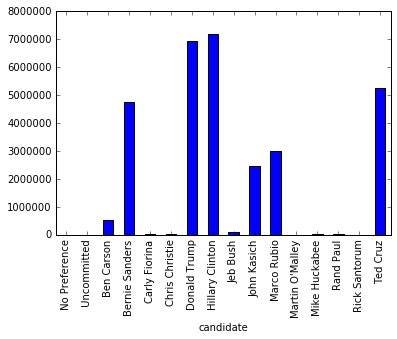

In [21]:
total_votes["votes"].plot(kind="bar")

In [22]:
#keep state and candidate names in the index
total_votes = primary_results.groupby(['state', 'candidate'],as_index = False).sum()

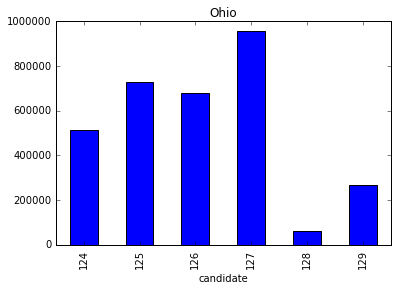

In [23]:
total_votes["votes"][total_votes['state']=="Ohio"].plot(kind="bar", title='Ohio')
plt.xlabel('candidate')

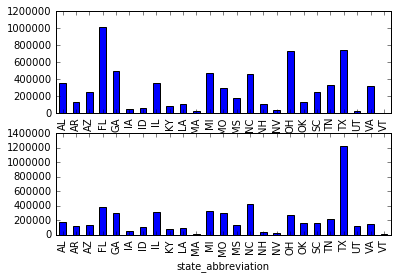

In [24]:
#Plot results by candidate across states
trump_results = primary_results[ primary_results[ 'candidate' ] == 'Donald Trump' ]
cruz_results = primary_results[ primary_results[ 'candidate' ] == 'Ted Cruz' ]
#count=trump_results['votes'].unique()
sumt=trump_results.groupby('state_abbreviation')['votes'].sum()
sumc=cruz_results.groupby('state_abbreviation')['votes'].sum()
fig = pl.figure()
ax = pl.subplot(2,1,1)
ax=sumt.plot(kind="bar")
ax = pl.subplot(2,1,2)
ax=sumc.plot(kind="bar")
plt.savefig("states.pdf")

In [54]:
donations = pd.read_csv("P00000001-GA.csv")
#P00000001-GA.csv


/Users/kathrynvasilaky/.pyenv/versions/3.5.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
#campaign financing
donations.head(5)
#donations[donations["contbr_zip"]=='314112123']

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00579458,P60008059,"Bush, Jeb","KANSO, RAMZI",KANSORAMZI@GMAIL.COM,GA,30004,ALERE INC.,VP ERM & CHIEF AUDIT EXECUTIVE,100.0,23-Oct-15,NaN,NaN,NaN,SA17A,1047278,SA17.162455,P2016
1,C00579458,P60008059,"Bush, Jeb","KANSO, RAMZI",KANSORAMZI@GMAIL.COM,GA,30004,ALERE INC.,VP ERM & CHIEF AUDIT EXECUTIVE,25.0,11-Nov-15,NaN,NaN,NaN,SA17A,1047278,SA17.167427,P2016
2,C00579458,P60008059,"Bush, Jeb","KANSO, RAMZI",KANSORAMZI@GMAIL.COM,GA,30004,ALERE INC.,VP ERM & CHIEF AUDIT EXECUTIVE,25.0,25-Nov-15,NaN,NaN,NaN,SA17A,1047278,SA17.171292,P2016
3,C00579458,P60008059,"Bush, Jeb","KANSO, RAMZI",KANSORAMZI@GMAIL.COM,GA,30004,ALERE INC.,VP ERM & CHIEF AUDIT EXECUTIVE,25.0,15-Dec-15,NaN,NaN,NaN,SA17A,1047278,SA17.176250,P2016
4,C00579458,P60008059,"Bush, Jeb","KANSO, RAMZI",KANSORAMZI@GMAIL.COM,GA,30004,ALERE INC.,VP ERM & CHIEF AUDIT EXECUTIVE,25.0,25-Dec-15,NaN,NaN,NaN,SA17A,1047278,SA17.178666,P2016


In [56]:
total_donations = donations.groupby("cand_nm").sum().sort_values("contb_receipt_amt")
#total_donations["contb_receipt_amt"].plot(kind="bar")

In [57]:
total_donations

,contb_receipt_amt,file_num
cand_nm,,
"Webb, James Henry Jr.",2700.00,12390290
"Jindal, Bobby",3600.00,12348848
"Lessig, Lawrence",3618.38,16471856
"Stein, Jill",4092.00,26082010
"Santorum, Richard J.",8457.79,12593480
"Perry, James R. (Rick)",12870.00,27725310
"O'Malley, Martin Joseph",13150.00,14319632
"Christie, Christopher J.",35128.00,46031933
"Huckabee, Mike",58092.50,297826229


In [66]:
pdonations = donations[["contbr_st", "contbr_occupation", "cand_nm", "contb_receipt_amt", "contbr_zip"]]
pdonations["contbr_st"] = pdonations["contbr_st"].astype('category')
pdonations["contbr_st"] = pdonations["contbr_st"].cat.codes


for column in ["contbr_st", "contbr_occupation", "cand_nm"]:
    pdonations[column] = pdonations[column].astype('category')
    pdonations[column] = pdonations[column].cat.codes

/Users/kathrynvasilaky/.pyenv/versions/3.5.1/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/kathrynvasilaky/.pyenv/versions/3.5.1/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/kathrynvasilaky/.pyenv/versions/3.5.1/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [67]:
from sklearn.cross_validation import train_test_split

In [70]:
train, test, y_train, y_test = train_test_split(pdonations[["contbr_st", "contbr_occupation"]], 
                                                pdonations["contb_receipt_amt"], test_size=0.33, random_state=1)


In [87]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
model = Ridge(alpha=0.1)
fit = model.fit(train, y_train)
predictions = model.predict(test)
mean_squared_error(predictions, y_test)
model.coef_
r2_score(predictions, y_test)

-53.143669811148804

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
fit = model.fit(train, y_train)
predictions = model.predict(test)
mean_squared_error(predictions, y_test)

427732.06361920456

In [80]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
fit = model.fit(train, y_train)
predictions = model.predict(test)
mean_squared_error(predictions, y_test)

479047.93431192602